# Practical work 6 : Harris Corner Detector

The goal of this pratical work is to implement the Harris-Stephen's corners detector (C. Harris and M. Stephens. A combined corner and edge detector. In Proc. Fourth Alvey Vision Conference, pages 147–151, 1988).

Recall the Harris detector computes a map of corners from an image $I$:
$$
R(x,y) = \operatorname{det}(M) - k (\operatorname{trace}(M))^2, (x,y) \text{pixels}
$$
with $k\in[0.04, 0.06]$. $M$ is the auto-correlation of image $I$:
$$
M=\begin{pmatrix}
\sum_{x,y \in W} w(x,y)I_x^2 &
\sum_{x,y \in W} w(x,y)I_xI_y \\
\sum_{x,y \in W} w(x,y)I_xI_y &
\sum_{x,y \in W} w(x,y)I_y^2 
\end{pmatrix}
=\begin{pmatrix}
A & C \\ C & B
\end{pmatrix}
$$
with $w(x,y)=\frac1{2\pi \sigma^2}e^{\frac{(x-x_c)^2 + (y-y_c)^2}{2\sigma^2}}$ a Gaussian mask centered on the window $W$. Partial derivatives $I_x$ and $I_y$ are estimated by one of the following kernels :
- Gradient:  $G_x = \begin{pmatrix} 0 & 0 & 0\\ 1 & 0 &-1 \\ 0 & 0 & 0 \end{pmatrix}$,
 $G_y = G_x^T$
- Prewitt: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 1 & 0 &-1 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
- Sobel: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 2 & 0 &-2 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
 


In [1]:
# Load useful libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Useful functions 
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

def gradientKernel():
    G_x = np.array([[0,0,0],[1,0,-1],[0,0,0]])
    return G_x, G_x.T

def prewittKernel():
    G_x = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    return G_x, G_x.T

def sobelKernel():
    G_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    return G_x, G_x.T

## Exercise 1: Harris response calculation

1) Write a function `computeR(I, scale, kappa)` that returns the Harris response $R$ from an image $I$ and a scale $scale$. You will use 5 steps:
- Computation of the directionnal derivate $I_x$ and $I_y$. Use the Sobel kernel.
- Computation of the products $I_x^2$, $I_y^2$, $I_x.I_y$.
- Computation of the convolution of $I_x^2$, $I_y^2$ and $I_x.I_y$ by a gaussian kernel of size N (use given function `gaussianKernel()`)
- Computation of $\operatorname{det}(M(x,y))$ and $\operatorname{trace}(M(x,y))$ for each pixel
- Computation of $R(x,y) = \operatorname{det}(M(x,y)) - k.(\operatorname{trace}(M(x,y)))^2$. You can use $k = 0.04$.

 You can compute the convolutions by using the ```scipy.signal.convolve2d``` function. 
 
 **Recall** : $\sigma = \frac{N-1}6$ to get a gaussian kernel of size $N$.


In [2]:
def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    n,m = image.shape
    # directionnal derivatives (using Sobel)
    I_x = signal.convolve2d(image, sobelKernel()[0], mode='same')
    I_y = signal.convolve2d(image, sobelKernel()[1], mode='same')
    
    # sigma such as size(w) = scale
    sigma = (scale - 1) / 6
    w = gaussianKernel(sigma)
    
    # convolution 
    A = signal.convolve2d(I_x*I_x, w, mode='same')
    B = signal.convolve2d(I_y*I_y, w, mode='same')
    C = signal.convolve2d(I_x*I_y, w, mode='same')
    
    # Harris detector
    M = np.array([[A,C],[C,B]])
    R = np.zeros((n,m))
    
    for i in range(n):
        for j in range(m):
            R[i,j] = np.linalg.det(M[:,:,i,j]) - kappa * (np.trace(M[:,:,i,j])*np.trace(M[:,:,i,j]))

    return R

In [ ]:
def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    n,m = image.shape
    # directionnal derivatives (using Sobel)
    I_x = signal.convolve2d(image, sobelKernel()[0], mode='same')
    I_y = signal.convolve2d(image, sobelKernel()[1], mode='same')
    
    # sigma such as size(w) = scale
    sigma = (scale - 1) / 6
    w = gaussianKernel(sigma)
    
    # convolution 
    A = signal.convolve2d(I_x*I_x, w, mode='same')
    B = signal.convolve2d(I_y*I_y, w, mode='same')
    C = signal.convolve2d(I_x*I_y, w, mode='same')
    
    # Harris detector
    M = np.array([[A,C],[C,B]])
    R = np.zeros((n,m))
    
    for i in range(n):
        for j in range(m):
            R[i,j] = np.linalg.det(M[:,:,i,j]) - kappa * (np.trace(M[:,:,i,j])*np.trace(M[:,:,i,j]))

    return R

2) Write a script that displays the Harris response for the image ```img/house2.png``` along with the original image. Use a gaussian window of size $W=15$ pixels.

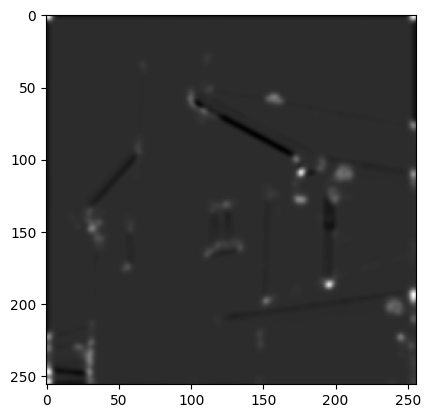

In [3]:
house2 = np.array(Image.open("img/house2.png"))
plt.imshow(computeR(house2, 15, 0.04), cmap="gray")

3) Write in a few lines an interpretation of the results, explaining how the Harris response allows to detect and discriminate homogeneous areas, edges and corners.

Your answer...

## Exercise 2 : Harris corner detector
From the Harris response calculated at exercise 1, we will write all the functions needed for the Harris detector. Write the following functions: 

1) A function `thresholdR(R, thres)` that calculates and returns the binary thresholding $R_b$ of the response $R$ according to the threshold $thres$

In [4]:
def thresholdR(R, thres):
    """ Array[n, m] * float -> Array[n, m]
    """
    return R > thres

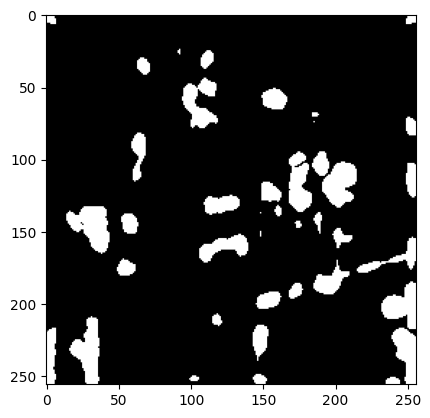

In [5]:
r = computeR(house2, 15, 0.04)
rbin = thresholdR(r, 1e7)
plt.imshow(rbin, cmap="gray")

2) A function `Rnms(R, Rbin)` that performs a non-maximum supression from the response $R$ and the binarized response $R_{bin}$. It returns the image $R_{locmax}$ (same size as $R$) =1 where $R_{bin}=1$ and the pixel has a greater value $R$ than its 8 nearest neighbors.

**Bonus**: Write a faster version of the script using Numpy function `np.roll()`.

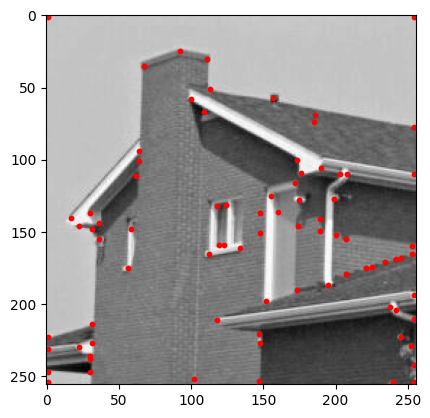

In [17]:
def Rnms(R):
    """ Array[n, m] -> Array[n, m] 
    """
    n,m = R.shape
    Rlocmax = np.zeros((n,m))
    for i in range(1, n-1): 
        for j in range(1, m-1): 
            neighborrow = R[i-1:i+2, j-1:j+2]
            Rlocmax[i,j] = R[i,j] == np.max(neighborrow)
    return Rlocmax

edgels = np.logical_and(Rnms(r), rbin)
plt.imshow(house2,cmap="gray")
plt.scatter(np.nonzero(edgels)[1],np.nonzero(edgels)[0],s=10,c="#ff0000" )
plt.show()

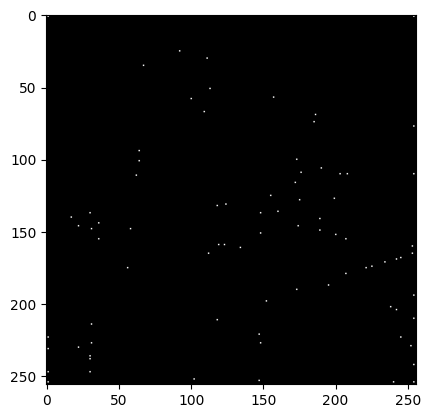

In [12]:
def Rnms(R, Rbin):
    """ Array[n, m] -> Array[n, m] 
    """
    n,m = R.shape
    Rlocmax = np.zeros((n,m))
    for i in range(1, n-1): 
        for j in range(1, m-1): 
            neighborrow = R[i-1:i+2, j-1:j+2]
            Rlocmax[i,j] = Rbin[i,j] == 1 and R[i,j] == np.max(neighborrow)
    return Rlocmax

plt.imshow(Rnms(r, rbin), cmap="gray")

3) Write a function ``cornerDetector(image, scale, kappa, thresh)`` that returns an array of the same size as the image. The array takes two values: 1 where a corner is detected and 0 elsewhere.

In [8]:
def cornerDetector(image, scale, kappa, thres):
    """ Array[n, m]*float*float*float -> Array[n, m]
    """
    edges = np.zeros((image.shape))
    R = computeR(image, scale, kappa)
    Rbin = thresholdR(R, thres)
    return Rnms(R, Rbin)

4 ) Display the detected corners on the original image for the image ```img/house2.png```. Each detected corner will be displayed as a small red disk. You can use the functions ```np.nonzero()``` and ```plt.scatter()``` to that purpose.

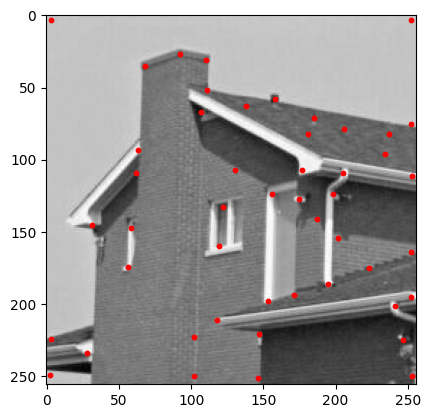

In [9]:
edgels = cornerDetector(house2, 31, 0.04, 1e6)
plt.imshow(house2,cmap="gray")
plt.scatter(np.nonzero(edgels)[1],np.nonzero(edgels)[0],s=10,c="#ff0000" )
plt.show()



5) Evaluate the performances of the corner detector. Try to find good values for Sigma and Threshold.

## Exercise 3 : Properties of Harris corner detector

The goal of this exercice is to study some invariance properties of Harris detector.

1) Write a script that detects the corners on the images ```img/toyHorse1.png``` and ```img/toyHorse2.png``` with a scale of 15 and appropriate threshold value. Display the detected corners on the images.

2) What are the dynamic ranges of these two images ?

Your answer...

3) What are the transformations beetween the two images ?

Your answer...

4) Using a fixed threshold, is the detection invariant to rotation ? To affine transformation of brightness ?

Your Answer